In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# The below two are visualization libraires
import matplotlib.pyplot as plt
import seaborn as sns 

# for calculating interval
from time import time

plt.rcParams['figure.figsize'] = 10,8 # setting default figure size for the kernel

# for clustering image pixels
from sklearn.cluster import KMeans 
# for simple image processing tasks
from skimage import io

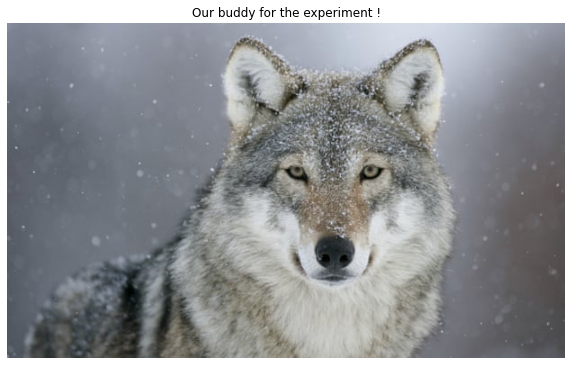

In [15]:
url = 'https://i.guim.co.uk/img/media/8f02bb49224d9a94699b75213664bf898617c062/0_288_5315_3189/master/5315.jpg?width=620&quality=85&auto=format&fit=max&s=7e747bf029dcde4fe3f6c855f7de3d9c'
img_original = io.imread(url)
plt.axis('off')
plt.imshow(img_original)
plt.title('Our buddy for the experiment !')
plt.show() 

In [16]:

img = np.array(img_original,dtype=float) / 255

# Save the dimensions, we will be need them later
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)

# image_array size - w*h , d
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape) 

===Original Shape===
(372, 620, 3)
======ReShaped======
(230640, 3)


In [17]:
n_colours = [64,32]

# 64 colour image
t0 = time()
kmeans64 = KMeans(n_clusters = n_colours[0],random_state=42,verbose=2).fit(image_array)

print('Completed 64 clusters in'+ str({round(time()-t0,2)})+'seconds.')

# 32 colour image
t0 = time()
kmeans32 = KMeans(n_clusters = n_colours[1],random_state=42,verbose=2)
kmeans32.fit(image_array)

print('Completed 32 clusters in' + str({round(time()-t0,2)})+  ' seconds.')

labels64 = kmeans64.labels_
labels32 = kmeans32.labels_


Initialization complete
Iteration 0, inertia 97.51574009997353
Iteration 1, inertia 81.96144434853338
Iteration 2, inertia 79.91244545452224
Iteration 3, inertia 79.29043256627497
Iteration 4, inertia 78.98734796146016
Iteration 5, inertia 78.75403317931912
Iteration 6, inertia 78.60802169703385
Iteration 7, inertia 78.51050082461074
Iteration 8, inertia 78.38893712971367
Iteration 9, inertia 78.27509017483604
Iteration 10, inertia 78.141715679368
Iteration 11, inertia 78.02554955059614
Iteration 12, inertia 77.94989153385927
Iteration 13, inertia 77.91134983156402
Iteration 14, inertia 77.87843047935999
Iteration 15, inertia 77.8446506754739
Iteration 16, inertia 77.81992032678929
Iteration 17, inertia 77.79599821719118
Iteration 18, inertia 77.77207288700464
Iteration 19, inertia 77.74820850705339
Iteration 20, inertia 77.73184701915096
Iteration 21, inertia 77.71597472310256
Iteration 22, inertia 77.70795136740153
Converged at iteration 22: center shift 1.871769798917523e-06 within 

In [18]:
print('Within cluster sum of square error for'+str( {n_colours[0]})+' clusters = '+str({round(kmeans64.inertia_,2)}))
print('Within cluster sum of square error for'+str( {n_colours[1]})+' clusters = '+str({round(kmeans32.inertia_,2)}))

Within cluster sum of square error for{64} clusters = {77.25}
Within cluster sum of square error for{32} clusters = {153.76}


In [19]:
def recreate_image(centroids, labels, w, h):
    # centroids variable are calculated from the flattened image
    # centroids: w*h, d 
    # so each row depicts the values per depth
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            # filling values in new image with centroid values
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1
    return image

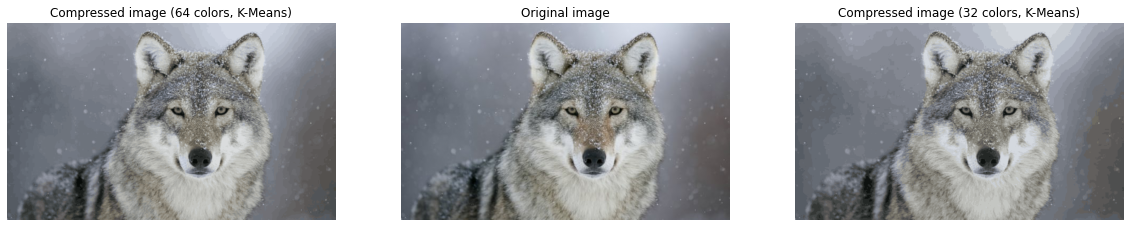

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.subplot(131)
plt.axis('off')
plt.title('Compressed image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))

plt.subplot(133)
plt.axis('off')
plt.title('Compressed image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))

plt.show()